# Example: adaptive_threshold

https://brian2.readthedocs.io/en/stable/examples/adaptive_threshold.html

In [1]:
import sys
#sys.path.append('/home/jovyan/brian2lava')
# sys.path.append('/home/carlo/Entwicklung/Python/brian2lava')
sys.path.append('/home/francesco/Developing/B2L/brian2lava')

In [2]:
from brian2 import *

# Import Brian2Lava
import brian2lava

# Set device
set_device('lava', hardware='CPU')
BrianLogger.log_level_debug()

DEBUG      Using synapses from generator [brian2.devices.lava]
DEBUG      Creating synapses from group 'poissongroup' to group 'neurongroup', using generator '_k for _k in range(N_post) if True' [brian2.synapses.synapses]
DEBUG      Updated MagicNetwork to include 11 objects with names neurongroup, statemonitor, synapses_pre, synapses, poissongroup_spike_thresholder, neurongroup_spike_resetter, neurongroup_spike_thresholder, spikemonitor, statemonitor_1, neurongroup_stateupdater, poissongroup [brian2.core.magic.magic_objects]
DEBUG      Preparing network 'magicnetwork' with 11 objects: neurongroup, statemonitor, statemonitor_1, synapses, neurongroup_stateupdater, neurongroup_spike_thresholder, poissongroup, poissongroup_spike_thresholder, spikemonitor, synapses_pre, neurongroup_spike_resetter [brian2.core.network.before_run]


{'_state_statemonitor_t': [], '_state_statemonitor_v': [], '_state_statemonitor_1_t': [], '_state_statemonitor_1_vt': [], '_spike_spikemonitor': [{'name': '_spike_spikemonitor_add_v', 'source': 'neurongroup', 'var': <DynamicArrayVariable(dimensions=metre ** 2 * kilogram * second ** -3 * amp ** -1,  dtype=float64, scalar=False, constant=False, read_only=True)>, 'indices': True, 'lava_var_name': '_neurongroup_v', 'lava_monitor': None, 'process_name': None}]}


DEBUG      Group neurongroup: using numerical integration method exact (took 0.30s) [brian2.stateupdaters.base.method_choice]
DEBUG      Network 'magicnetwork' uses 1 clocks: defaultclock (dt=100. us) [brian2.core.network.before_run]
DEBUG      Building Lava device. [brian2.devices.lava]
DEBUG      Writing Lava project to directory lava_workspace [brian2.devices.lava]
DEBUG      Running process: synapses [brian2.devices.lava]


Running Lava simulation for 20. ms (201 steps)


DEBUG      Successfully run simulation [brian2.devices.lava]
DEBUG      Successfully retrieved monitor values [brian2.devices.lava]
DEBUG      Updating Brian class attributes.. [brian2.devices.lava]
DEBUG      Array _synapses_N_incoming has length 0, ignoring.. [brian2.devices.lava]
DEBUG      Array _synapses_N_outgoing has length 0, ignoring.. [brian2.devices.lava]


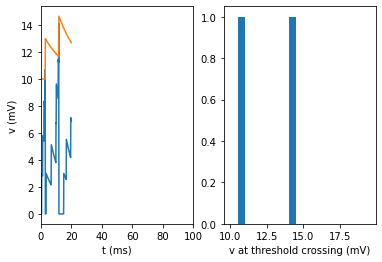

In [3]:
eqs = '''
dv/dt = -v/(10*ms) : volt
dvt/dt = (10*mV-vt)/(15*ms) : volt
'''

reset = '''
v = 0*mV
vt += 3*mV
'''

IF = NeuronGroup(1, model=eqs, reset=reset, threshold='v>vt',
                 method='exact')
IF.vt = 10*mV
PG = PoissonGroup(1, 500 * Hz)

C = Synapses(PG, IF, on_pre='v += 3*mV')
C.connect()

Mv = StateMonitor(IF, 'v', record=True)
Mvt = StateMonitor(IF, 'vt', record=True)
# Record the value of v when the threshold is crossed
M_crossings = SpikeMonitor(IF, variables='v')
run(20*msecond, report='text')

subplot(1, 2, 1)
plot(Mv.t / ms, Mv[0].v / mV)
plot(Mvt.t / ms, Mvt[0].vt / mV)
ylabel('v (mV)')
xlabel('t (ms)')
# zoom in on the first 100ms
xlim(0, 100)
subplot(1, 2, 2)
hist(M_crossings.v / mV, bins=np.arange(10, 20, 0.5))
xlabel('v at threshold crossing (mV)')
show()